In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inflection
from IPython.display import Image


In [2]:
df = pd.read_csv("train.csv")

In [3]:
# Base de dados retirada
#https://www.kaggle.com/datasets/prachi13/customer-analytics

In [4]:
#  Dicionário das Features

#ID: Número de ID dos Clientes
# Bloco de armazém: A empresa tem um grande armazém que é dividido em blocos como A, B, C, D, E.
# Modo de envio: A Empresa Envia os produtos de várias maneiras, como Navio, Voo e Rodoviário.
# Chamadas de atendimento ao cliente: O número de chamadas feitas a partir de consulta para consulta da remessa.
# Avaliação do cliente: A empresa avaliou cada cliente. 1 é o mais baixo (Pior), 5 é o mais alto (Melhor).
# Custo do produto: Custo do Produto em dólares americanos.
# Compras anteriores: o número de compras anteriores.
# Importância do produto: A empresa categorizou o produto em vários parâmetros, como baixo, médio, alto.
# Gênero: Masculino e Feminino.
# Desconto oferecido: Desconto oferecido naquele produto específico.
# Peso em gramas: É o peso em gramas.
# Atingido na hora: É a variável alvo, onde 1 indica que o produto NÃO chegou na hora e 0 indica que chegou na hora.


In [5]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [6]:
# Identificando os nomes da colunas

df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [7]:
# Armazenando os nomes das colunas em uma variável

cols_old = ['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N']

In [8]:
# Função snakecase para padrozinar os nomes das colunas 

snakecase = lambda x: inflection.underscore( x )
cols_new = list( map( snakecase, cols_old ) )

# rename
df.columns = cols_new

In [9]:
# Check com o novo formato dos nomes das colunas

df

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [10]:
# Drop coluna id

df2 = df.drop(["id"], axis = 1)

In [11]:
# Estatística descritiva das features numéricas

df2.describe()

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached.on.time_y.n
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [12]:
# Check nos dados nulos do dataframe

df2.isnull().sum()

warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
reached.on.time_y.n    0
dtype: int64

In [13]:
# Informações do dataframe

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   warehouse_block      10999 non-null  object
 1   mode_of_shipment     10999 non-null  object
 2   customer_care_calls  10999 non-null  int64 
 3   customer_rating      10999 non-null  int64 
 4   cost_of_the_product  10999 non-null  int64 
 5   prior_purchases      10999 non-null  int64 
 6   product_importance   10999 non-null  object
 7   gender               10999 non-null  object
 8   discount_offered     10999 non-null  int64 
 9   weight_in_gms        10999 non-null  int64 
 10  reached.on.time_y.n  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


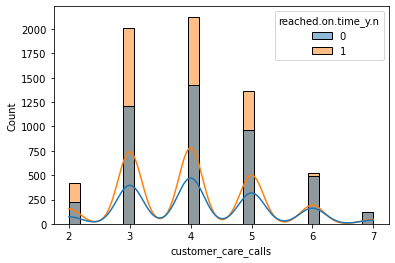

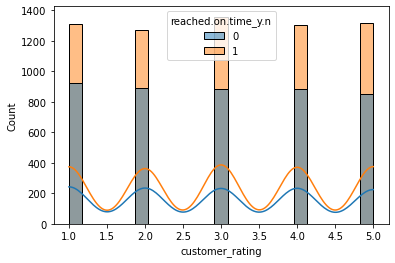

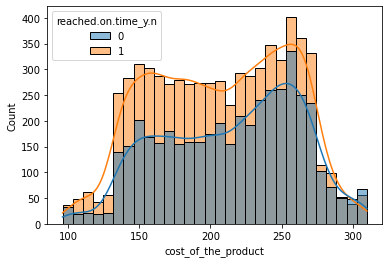

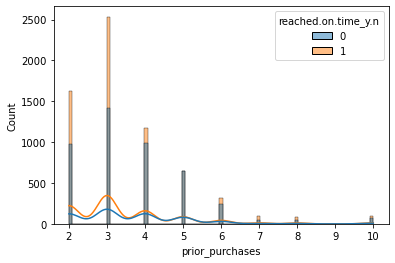

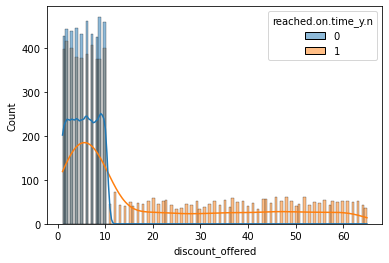

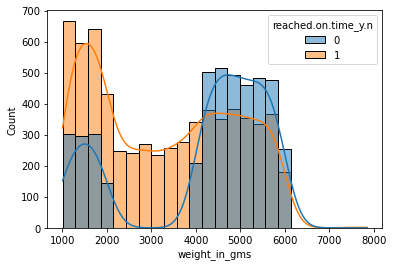

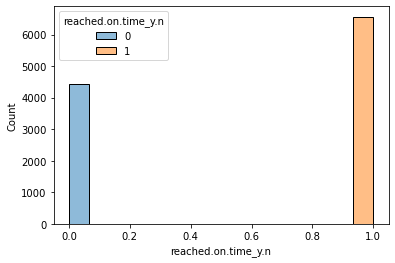

In [14]:
# plot da distribuição dos dados das colunas numéricas

for col in df2.select_dtypes(include=[np.number]).columns:
    
    sns.histplot(data=df, x=col, kde=True, hue="reached.on.time_y.n")
    
    plt.show()

# Mindmap de hipóteses

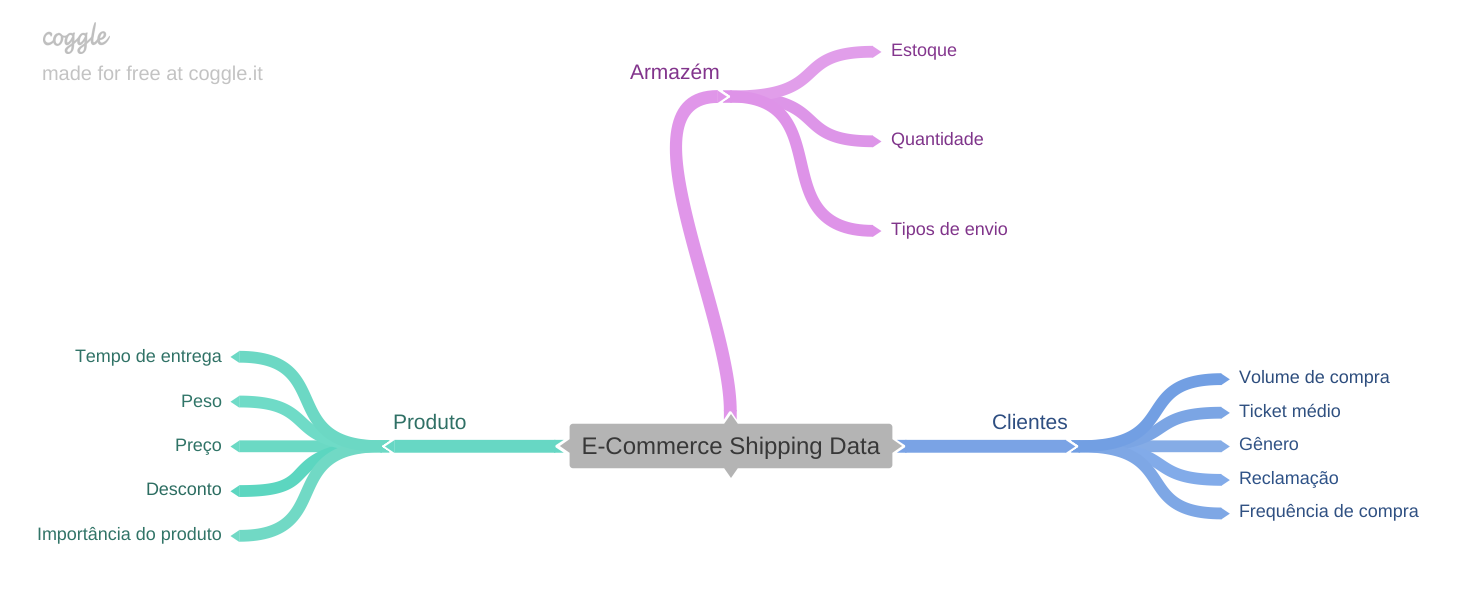

In [15]:
# mindmap de hipoteses

Image(filename='E-Commerce_Shipping_Data.png')

In [16]:
# Participação correspondente a cada armazém

df["warehouse_block"].value_counts(normalize=True)

F    0.333303
D    0.166742
A    0.166652
B    0.166652
C    0.166652
Name: warehouse_block, dtype: float64

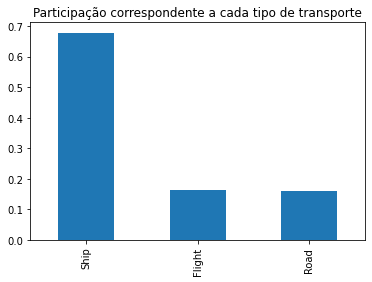

In [17]:
# Participação correspondente a cada tipo de transporte

df["mode_of_shipment"].value_counts(normalize=True).plot.bar()
plt.title("Participação correspondente a cada tipo de transporte")
plt.show()

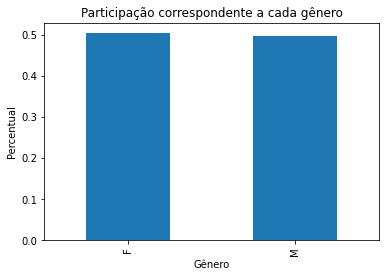

In [18]:
# Participação correspondente a cada gênero 

df["gender"].value_counts(normalize=True).plot.bar()
plt.title("Participação correspondente a cada gênero")
plt.xlabel('Gênero')
plt.ylabel('Percentual')
plt.show()

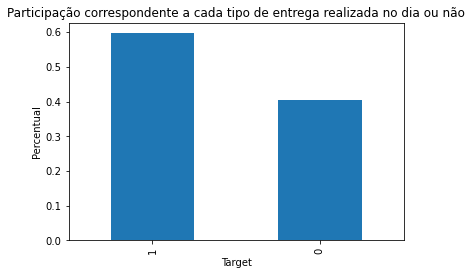

In [19]:
# Participação correspondente a cada tipo de entrega realizada no dia ou não

df["reached.on.time_y.n"].value_counts(normalize=True).plot.bar()
plt.title("Participação correspondente a cada tipo de entrega realizada no dia ou não")
plt.xlabel('Target')
plt.ylabel('Percentual')
plt.show()

In [20]:
# Estatística descritiva do custo do produto

df["cost_of_the_product"].describe()

count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: cost_of_the_product, dtype: float64

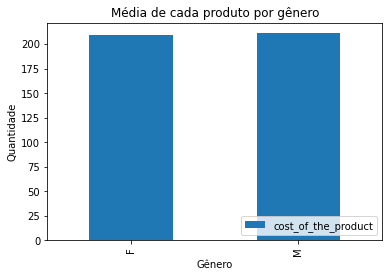

In [21]:
# Qual a média de cada produto por gênero? 

df.groupby("gender")[["cost_of_the_product"]].mean().plot.bar()
plt.title("Média de cada produto por gênero")
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.legend(['cost_of_the_product'], loc=4) 
plt.show()

In [22]:
# Qual a quantidade de pedidos que foram entregues na data correta e que sofreram atrasos comparando os gêneros? 

df.groupby(["gender", "reached.on.time_y.n"])[["gender"]].count()

gender
gender reached.on.time_y.n        
F      0                      2249
       1                      3296
M      0                      2187
       1                      3267

In [23]:
# Qual a quantidade de pedidos e importância entre os gêneros?

df.groupby(["gender", "product_importance"])[["gender"]].count()

gender
gender product_importance        
F      high                   470
       low                   2652
       medium                2423
M      high                   478
       low                   2645
       medium                2331

In [24]:
# Quantidade de pedidos por armazém e importância de produto?

df.groupby(["warehouse_block", "product_importance", "gender"])[["gender"]].count()


gender
warehouse_block product_importance gender        
A               high               F           91
                                   M           74
                low                F          457
                                   M          452
                medium             F          380
                                   M          379
B               high               F           79
                                   M           67
                low                F          424
                                   M          431
                medium             F          405
                                   M          427
C               high               F           86
                                   M           82
                low                F          444
                                   M          430
                medium             F          391
                                   M          400
D               high               F           73
                                   M           93
                low                F          445
                                   M          438
                medium             F          415
                                   M          370
F               high               F          141
                                   M          162
                low                F          882
                                   M          894
                medium             F          832
                                   M          755

In [25]:
# Qual a quantidade de pedidos correspondente a cada armazém que tiveram ou não atrasos na entrega separados 
#também por tipo de transporte?  

df.groupby(["warehouse_block", "reached.on.time_y.n", "mode_of_shipment"])[["mode_of_shipment"]].count()




mode_of_shipment
warehouse_block reached.on.time_y.n mode_of_shipment                  
A               0                   Flight                         123
                                    Road                           126
                                    Ship                           509
                1                   Flight                         174
                                    Road                           168
                                    Ship                           733
B               0                   Flight                         119
                                    Road                           122
                                    Ship                           488
                1                   Flight                         177
                                    Road                           172
                                    Ship                           755
C               0                   Flight                         111
                                    Road                           125
                                    Ship                           503
                1                   Flight                         184
                                    Road                           169
                                    Ship                           741
D               0                   Flight                         119
                                    Road                           118
                                    Ship                           501
                1                   Flight                         178
                                    Road                           174
                                    Ship                           744
F               0                   Flight                         236
                                    Road                           234
                                    Ship                          1002
                1                   Flight                         356
                                    Road                           352
                                    Ship                          1486

In [26]:
# Qual é a média do custo do produto que tiveram as entregas atrasadas? 

df.groupby([ "reached.on.time_y.n"])[["cost_of_the_product"]].mean()




,cost_of_the_product
reached.on.time_y.n,
0,214.498647
1,207.289197


In [27]:
# Qual a relação de desconto de mercadoria por armazém? 

df.groupby(["warehouse_block"])[["discount_offered"]].mean()


,discount_offered
warehouse_block,
A,13.222586
B,13.187125
C,13.399891
D,13.093784
F,13.668031


In [28]:
# Clientes com mais chamadas para o callcenter receberam mais descontos? 

df.groupby(["customer_care_calls", "gender"])[["discount_offered"]].mean()


discount_offered
customer_care_calls gender                  
2                   F              16.547112
                    M              17.016181
3                   F              16.011671
                    M              14.550031
4                   F              13.208989
                    M              13.392234
5                   F              12.610445
                    M              12.625862
6                   F               8.949612
                    M               8.672032
7                   F               6.725806
                    M               6.196721

# Transformação dos dados

In [29]:
df.select_dtypes(include=object)

,warehouse_block,mode_of_shipment,product_importance,gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F
...,...,...,...,...
10994,A,Ship,medium,F
10995,B,Ship,medium,F
10996,C,Ship,low,F
10997,F,Ship,medium,M


In [30]:
# Check nos níveis de cada coluna categórica

for coluna in df.select_dtypes(exclude=np.number).columns:
    
    print("Na coluna {} existem {} níveis categóricos\n".format(coluna, len(df[coluna].unique())))

Na coluna warehouse_block existem 5 níveis categóricos

Na coluna mode_of_shipment existem 3 níveis categóricos

Na coluna product_importance existem 3 níveis categóricos

Na coluna gender existem 2 níveis categóricos



In [31]:
# Transformando os dados categóricos em númericos

for coluna in df.select_dtypes(exclude=np.number).columns:
    
    print(dict(enumerate(df2[coluna].astype("category").cat.categories)))
        
    df2[coluna] = df2[coluna].astype("category").cat.codes
    
    print("\n\n")

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}



{0: 'Flight', 1: 'Road', 2: 'Ship'}



{0: 'high', 1: 'low', 2: 'medium'}



{0: 'F', 1: 'M'}





In [38]:
from sklearn.preprocessing import MinMaxScaler

X = df2.drop("reached.on.time_y.n", axis = 1)
y = df2["reached.on.time_y.n"]
columns = X.columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = columns)
X.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms
0,0.75,0.0,0.4,0.25,0.378505,0.125,0.5,0.0,0.671875,0.033893
1,1.00,0.0,0.4,1.00,0.560748,0.000,0.5,1.0,0.906250,0.304894
2,0.00,0.0,0.0,0.25,0.406542,0.250,0.5,1.0,0.734375,0.346676
3,0.25,0.0,0.2,0.50,0.373832,0.250,1.0,1.0,0.140625,0.025712
4,0.50,0.0,0.0,0.25,0.411215,0.125,1.0,0.0,0.703125,0.216654


In [40]:
columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms'],
      dtype='object')

In [39]:

# 1) importe a classe do classificador
from sklearn.linear_model import LogisticRegression

# 2) instancie a classe
estimador = LogisticRegression()

# 3) faça o train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
# 4) treine o modelo
modelo = estimador.fit(X_train, y_train)

# dê uma olhada nos coeficientes
print("Coeficientes:\n", modelo.coef_)
print("\nIntercept:", modelo.intercept_)

# dê uma olhada nas classes do modelo
classes =  modelo.classes_
print("\nClasses:", classes)

# 5) probabilidades das previsões
probs = modelo.predict_proba(X_test)

# probabilidade de pertencimento à classe 1
probs_1 = probs[:, 1]

# avaliação  do modelo
from sklearn.metrics import classification_report, confusion_matrix

threshold_list = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

print("\n###################################################\n")
print("Avaliação de modelos com diferentes valores de cutoff")
print("\n###################################################\n")

for threshold in threshold_list:
    
    print("\n Cutoff:", threshold)
    
    # previsões
    y_pred = np.where(probs_1 > threshold, 1, 0)

    print("\nMatriz de confusão do modelo nos dados de teste:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification report do modelo nos dados de teste:")
    print(classification_report(y_test, y_pred))
    
    print("\n##########################################################\n")

Coeficientes:
 [[-4.53945334e-03 -1.42001717e-02 -6.13564443e-01  1.32259751e-01
  -4.70747052e-01 -6.78801704e-01 -1.67112798e-01  3.60142999e-02
   6.52501577e+00 -1.60420685e+00]]

Intercept: [0.89866961]

Classes: [0 1]

###################################################

Avaliação de modelos com diferentes valores de cutoff

###################################################


 Cutoff: 0.2

Matriz de confusão do modelo nos dados de teste:
[[   0 1312]
 [   1 1987]]

Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1312
           1       0.60      1.00      0.75      1988

    accuracy                           0.60      3300
   macro avg       0.30      0.50      0.38      3300
weighted avg       0.36      0.60      0.45      3300


##########################################################


 Cutoff: 0.3

Matriz de confusão do modelo nos dados de teste:
[[  52 1260]
 [  3